*Surnmame and Initials*

*Student Number*

### Semester Test 2 MKM321 Full marks [45], Total marks [49]

# Question 1 **[15]** - Multiple choice to be answered on multiple choice sheet form

### 1.1 How many Gauss points will exactly integrate the following expression: [3]
### $$\int_{-1}^{1} \left(2\xi(\xi - 1)^3(\xi + 2 )^4\right)\; d\xi$$

### a) 5
### b) 4
### c) 3
### d) None of the above

In [7]:
#a
import sympy as sp

xi = sp.symbols('xi')

f = sp.simplify((2*xi*(xi-1)**3)*((xi+2)**4))
display(f)


def integrand(x):
    return((2*x*(x-1)**3)*((x+2)**4))
    
    
def GaussInt(n1,n2,function):
    points = [[0],[-0.57735026918962,0.57735026918962],[-0.77459666924148,0,0.77459666924148],[-0.8611363116,-0.3399810436,0.3399810436,0.8611363116]]
    weights = [[2],[1,1],[5/9,5/9,5/9],[0.3478548451,0.6521451549,0.6521451549,0.3478548451]]
    
    middel = (n1+n2)/2
    l = abs(middel-n1)
    answers = []
    for idx,i in enumerate(points):
        b = 0
        for jdx,j in enumerate(i):
            b = b+ (weights[idx][jdx]*function(l*points[idx][jdx]))
        answers.append(b)
        
    return answers

print(GaussInt(-1,1,integrand))
        
   

    

2*xi*(xi - 1)**3*(xi + 2)**4

[0.0, 14.716049382715873, 10.261333333333322, 10.668843537290186]


### 1.2 Consider a structure modelled by a three-noded quadratic element with the mid-side node in the middle and constrained at node 1. The only load is a force of $F=1$ kN, that is applied at node 3.  A $1$mm displacement at node 3 is computed. What is the amount of strain energy stored in the structure. [3]
### a) 1000 J
### b) 1 J
### c) 0.5 J
### d) None of the above

In [2]:
#c 

### 1.3 Given the following displacement field defined in the local coordinate system of a 2-noded finite element:
### $u(\xi) = 0.5 \left[1 - \xi \right]q_1 + 0.5 \left[1 + \xi \right]q_2$
### used to solve a structure under uniaxial compression.
### Which statements regarding the interal force field computed from the conticnuous FEM solution is true when the area varies linearly  and the Young's modulus varies quadratically along the length of the element:
### a) internal force varies linearly over $\xi$
### b) internal force varies quadratically over $\xi$
### c) internal force varies cubically over $\xi$
### d) None of the above

In [14]:
#c 
xi,a,b,c,d,e,f,g = sp.symbols('xi,a,b,c,d,e,f,g')
A = a*xi + b
E = c*xi**2 + d*xi + e
u = (f*xi + g)
dudxi = f
P = E*(dudxi)


F = P*A

display(sp.simplify(F))




f*(a*xi + b)*(c*xi**2 + d*xi + e)

### 1.4 Consider a newly developed six-noded finite element defined over $-1\leq \xi \leq 1$. What is the expected polynomial order/degree over defined over the $\xi$ domain: **[3]**
### a) cubic (order/degree 3)
### b) quintic (order/degree 5)
### c) septic (order/degree 7)
### d) None of the above.

In [4]:
#b

### 1.5  Consider a three-noded quadratic element with the left node at $x_1=5$m, the right node $x_2=7.5$m and the midside node $x_3 = 6.25$m. What is $\frac{dx}{d\xi}$: **[3]**
### a) 2.5
### b) 1.25
### c) 0.8
### d) None of the above

In [15]:
#b
x,xi = sp.symbols('x,xi')
L0 = -1/2*xi*(1-xi)
L1 = 1/2*xi*(1+xi)
L2 = (1-xi)*(1+xi)

xpos = L0*5 + L1*7.5 + L2*6.25

dxdxi = sp.derive_by_array(xpos,xi)
display(dxdxi)

1.25000000000000

# Question 2 [15]
### Consider a bar of total length 10m made up of welding two bars together, a 5m bar (bar 1) with constant area  $A(x) = 0.003\;\textrm{m}^2$ and a 5m bar (bar 2) of constant area  $A(x) = 0.001\;\textrm{m}^2$ as shown in the Figure below.
### The bar is modelled using two quadratic (3-noded) 1D finite elements with equally spaced nodes. 
### The global node numbering is as indicated in the Figure below.
### The left edge at $x=0$ is clamped.
### The right edge at $x=10$ is clamped.
### The middle of the bar is displaced by 0.1mm to the right.
### The bar is made of Titanium with a Young's modulus of $E(x) = 115$ GPa.

*Answer here and give a clear motivication for your answer*

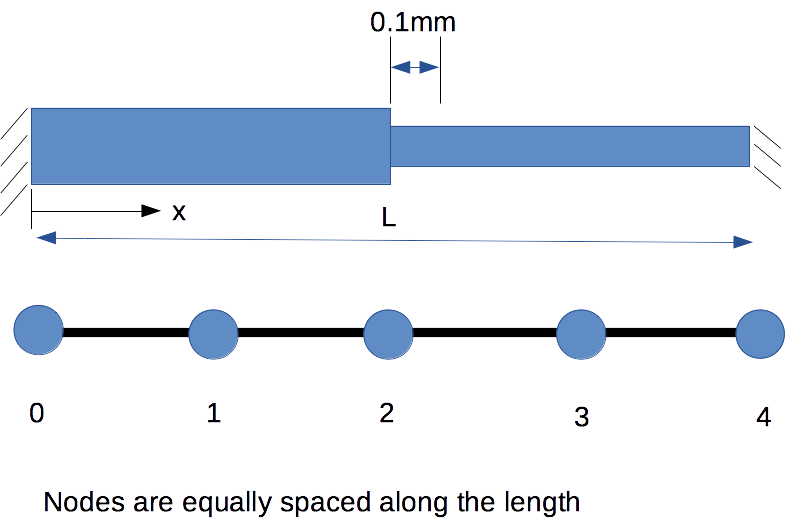

In [1]:
from IPython.display import Image
Image(filename="problem2_2019.png",embed=True)

### 2.1 What is the expected stress in bar 2 [3]

In [33]:
d = -0.1/1000 # compression
L = 5 # element length
E = 115*10**9 # material
strain = d/L 
sigma = E*strain
print("Compute 1: Sigma = {} MPa".format(sigma/10**6))
#####################################################
d = -0.1/1000 # compression
A = 0.001
E = 115*10**9
L = 5
F = (d*A*E)/L
sigma = F/A
print(sigma/10**6)
print("Compute 2: Sigma = {} MPa".format(sigma/10**6))
#####################################################
# correct value 2.3 MPa [1]
# correct unit + orders of magnitudes [1]  
# Correct sign [1]: Negative sign for compression.

Compute 1: Sigma = -2.3 MPa
-2.3000000000000003
Compute 2: Sigma = -2.3000000000000003 MPa


### 2.2 Clearly indicate the nodes where reaction forces are expected  [2]

In [3]:
#####################################################
# reaction forces at 3 nodes [1]
# Node # 0, 2 and 4 [1]

### 2.3 Solve for the unknown displacements [5]
### The global stiffness matrix in the code block below has units N/m.

In [4]:
import numpy as np
# 
Kglobal = np.array([[ 161000000.0, -184000000.0,        23000000.0,                 0,                 0],
                    [-184000000.0,  368000000.0,      -184000000.0,                 0,                 0],
                    [  23000000.0, -184000000.0,  214666666.666667, -61333333.3333334,  7666666.66666668],
                    [           0,            0, -61333333.3333334,  122666666.666667, -61333333.3333334],
                    [           0,            0,  7666666.66666668, -61333333.3333334,  53666666.6666667]])
#------------- Answer the questions below ---------------------------
#####################################################################
# Simplified version
#####################################################################
Kuu = Kglobal[[1,3],:][:,[1,3]] # [2X2]
Kuk = Kglobal[[1,3],[2]] #
uk = 0.1/1000
F = np.array([0,0])
# Load vector is zeros as no forces are applied for the problem
uu = np.linalg.solve(Kuu,F - uk*Kuk)
print(F - uk*Kuk)

print('Unknown displacements: \n {}'.format(uu))

#####################################################################
# Full step version
#####################################################################
Kuu = Kglobal[[1,3],:][:,[1,3]] # [2X2]
Kuk = Kglobal[[1,3],:][:,[0,2,4]] #
uk = np.array([[0,0.1/1000,0]]).T
F = np.array([[0,0]]).T
# Load vector is zeros as no forces are applied for the problem
uu = np.linalg.solve(Kuu,F - np.dot(Kuk,uk))

print('Unknown displacements: \n {}'.format(uu))
#####################################################
# Kuu:
    # Size 2X2 [1]
    # row 1,3 of Kglobal [1] 
    # col 1,3 of Kglobal [1] 

# Correct RHS term [1]
# 2 unknown displacements [1]

[18400.          6133.33333333]
Unknown displacements: 
 [5.e-05 5.e-05]
Unknown displacements: 
 [[5.e-05]
 [5.e-05]]


### 2.4 Solve for the nodal reaction forces [2]
### If you could not solve the previous questions assume nodal displacement values and conduct the calculation using the assumed values.

In [35]:
u = np.array([0,5.E-5,1E-4,5.E-5,0])
#-----------------------------------

print('Full displacement vector (not required for grades just to demonstrate): \n {}'.format(u))

ReactionForceLeft = np.dot(Kglobal[0,:],u)
print('Reaction Force At Left {}'.format(ReactionForceLeft))

ReactionForceMiddle = np.dot(Kglobal[2,:],u)
print('Reaction Force In Middle Left {}'.format(ReactionForceMiddle))

ReactionForceRight = np.dot(Kglobal[4,:],u)
print('Reaction Force At Right {}'.format(ReactionForceRight))

F = np.array([ReactionForceLeft, 0,ReactionForceMiddle,0,ReactionForceRight])
print(F*(1/1000), 'kN')

#####################################################
# np.dot(K,u) [1] 
# 3 unknown forces at the relevant nodes 0, 2, 4 [1] 

Full displacement vector (not required for grades just to demonstrate): 
 [0.e+00 5.e-05 1.e-04 5.e-05 0.e+00]
Reaction Force At Left -6900.0
Reaction Force In Middle Left 9200.000000000035
Reaction Force At Right -2300.0000000000023
[-6.9  0.   9.2  0.  -2.3] kN


### 2.5 Confirm that nodal equilibrium for element 1, element 2 and  global equilibrium is satisfied: [3]

In [36]:
print("Reaction Forces:")
print("Reaction forces Node 0: {} N".format(F[0]))
print("Reaction forces Node 2: {} N".format(F[2]))
print("Reaction forces Node 4: {} N".format(F[4]))
print("Forces Node 1: {} N must be zero as we applied no tractions or reactions there - internal force just left of node and just right of node equal and opposite".format(F[1]))
print("Forces Node 3: {} N must be zero as we applied no tractions or reactions there - internal force just left of node and just right of node equal and opposite".format(F[3]))

# sum of all applied loads and reaction forces in x-direction = 0
global_eq = F[0] + F[2] + F[4]
# acceptable sum of all nodes as F[1] = 0 and F[3] = 0 from what is solved
global_eq = F[0] + F[1] + F[2] + F[3] + F[4] 

# sum of all applied loads and reaction forces in x-direction = 0
# Node[2] is the reaction force with a contribution for element 1 and a contribution for element 2 
# element 1 (tension) reaction force contribution is F[2]/(0.003+0.001)*0.003
# element 2 (compression) reaction force contribution is F[2]/(0.003+0.001)*0.001

# magnitude stress element 1 = magnitude stress element 2 -> Element area dicates force split, F = sigma*A
el1_eq = F[0] + F[2]/(0.003+0.001)*0.003 
el2_eq = F[4] + F[2]/(0.003+0.001)*0.001
# OR
el1_eq = F[0] + F[1] + F[2]/(0.003+0.001)*0.003 
el2_eq = F[4] + F[3] + F[2]/(0.003+0.001)*0.001

print(el1_eq, el2_eq, global_eq)

#####################################################
# 2 Global equilibrium.
# 1 Partition of F[2] & nodal equilibrium.

Reaction Forces:
Reaction forces Node 0: -6900.0 N
Reaction forces Node 2: 9200.000000000035 N
Reaction forces Node 4: -2300.0000000000023 N
Forces Node 1: 0.0 N must be zero as we applied no tractions or reactions there - internal force just left of node and just right of node equal and opposite
Forces Node 3: 0.0 N must be zero as we applied no tractions or reactions there - internal force just left of node and just right of node equal and opposite
2.546585164964199e-11 6.366462912410498e-12 3.228706191293895e-11


# Question 3 [15][Maximum 16] 
### The displacement, strain, stress and force fields given below are claimed to be the solution of the problem given in Question 2. When disputing the provided magnitudes on the graphs, an expected value MUST be provided with a clear motivation and calculation behind the estimated expected value.
### 3.1 Highlight aspects of the displacement result that is consistent and/or inconsistent with the FEM solution for the stated problem. A clear motivation of the similarities or differences between the expected and shown result must be given. [4] 
### 3.2 Highlight aspects of the strain result that is consistent and/or inconsistent with the FEM solution for the stated problem. A clear motivation of the similarities or differences between the expected and shown result must be given.  [4] 
### 3.3 Highlight aspects of the stress result that is consistent and/or inconsistent with the FEM solution for the stated problem. A clear motivation of the similarities or differences between the expected and shown result must be given. [4]  
### 3.4 Highlight aspects of the internal force result that is consistent and/or inconsistent with the FEM solution for the stated problem. A clear motivation of the similarities or differences between the expected and shown result must be given. [4] 

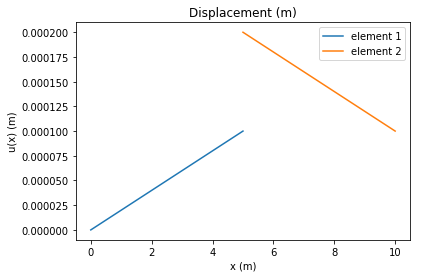

In [17]:
from IPython.display import Image
Image(filename="problem32_displacement_2019.png",embed=True)

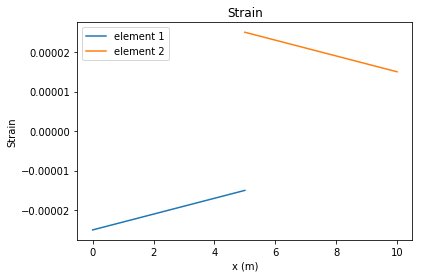

In [18]:
from IPython.display import Image
Image(filename="problem32_strain_2019.png",embed=True)

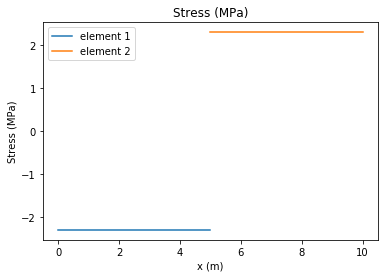

In [20]:
from IPython.display import Image
Image(filename="problem32_stress_2019.png",embed=True)

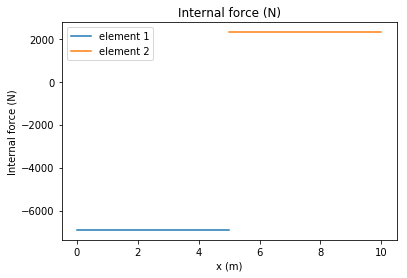

In [22]:
from IPython.display import Image
Image(filename="problem32_forces_2019.png",embed=True)

## 3.1. Displacement result [4]:
### Should begin and end at 0 - prescribed displacement. 
### middle point should be at 0.1mm - prescribed displacement for single nodal value
### should be continuous - displacement cannot be discontinuous in FEM.
### linear displacement correct and expected - element area and material constant. Load result constant strain - element can represent constant, linear up to quadratic displacement fields - hence linear is possible with this element.


## 3.2. Strain result [4]:
### constant strains are expected from FEM, not linear
### signs are swapped. Should be tension on left (+), not compression; then compression on left (-), not tension
### two elements have equal magnitude
### approximate magnitude is correct (0.00002) - hand calc
### element-wise discontinuous strains are expected
### show or describe a relevant relationship in relation to the problem (derivative, formula etc.)


## 3.3. Stress result [4]:
### constant stresses are expected from FEM
### signs are swapped. Should be tension on left (+), not compression; then compression on left (-), not tension
### element-wise discontinuous stresses are expected
### stress in both elements have equal magnitudes
### magnitudes are correct at 0.00002*115000 MPa
### show or describe a relevant relationship in relation to the problem (derivative, formula etc.)


## 3.4. Internal Force result [4]:
### constant internal forces are expected from FEM
### signs are swapped. Should be tension on left (+), not compression; then compression on left (-), not tension
### element-wise discontinuous internal forces are expected
### magnitudes: 2.3MPa*0.003=6900N and 2.3MPa*0.001=2300N same as given on graph
### link values to correct reaction force solution of Q2  
### show or describe a relevant relationship in relation to the problem (derivative, formula etc.)
